# REGIONAL REGRASJONSANALYSE AV TOTALT TILSIG/MAGASINVOLUM
## Tipper/predikerer foregående ukes verdi
Dette scriptet utfører en estimering det totale tilsiget (ukjent+kjent) i hver av regionene: NO1-NO5 og SE1-SE4. Tippingen på tilsig og/eller magasin er basert på regresjon fra en mengde kjente serier for bla. tilsig og magasinvolum. Tippingen skrives til seriene regest% (søk i tidsserier). 

Beskrivelse av metoden:
1. Leser inn kjente serier for tilsig og/eller magasinvolum fra SMG, og henter ukesverdiene. Dette gjøres i egen celle slik at man kan kun trenger å lese inn en gang siden dette tar noen minutter.
2. Leser inn fasiten, og regner så ut korrelasjonen (R2) mellom faiten og inputseriene. Et antall serier som skal tas med videre velges så utifra "ant_kandidater" med høyeste korrelasjon med fasiten.
3. Kjøre regresjon så langt tilbake som vi har data (2015.06.08), og luker ut den høyeste p-verdien. Dette kjøres om og om igjen helt til den høyeste p-verdien er laveren enn "max_p".
4. Til slutt kjøres en regresjon på en kortere periode (reg_period) med utvalget av serier som har blitt gjort i steg 2 og 3. Resultatet fra denne regresjonen blir modellen som brukes til å estimere/tippe neste ukes verdi.
5. Scriptet gjør 10 slike tippinger, 10 uker tilbake i tid, for hver kjøring. 

Tuning av regresjonen utføres ved å spesifisere ant_kandidater, max_p og reg_period, som når man er fornøyd kan oppdateres i default_input_variables. For at dette skal bli brukt i autojobben, må man ta kontakt med Sarah, slik at dette kan legges inn i PyCharm scriptet som utfører autojobben (tirsdag 06:00 og 11:00).

Scriptet er laget av Sarah Gjermo, på bestilling fra Svein Farstad. Sist endret 06.05.2019.

## INNLESNING OG KLARGJØRING
Kjøres kun en gang!

In [1]:
from shyft.api import utctime_now  # To time the reading from SMG
from regression_modules import *
start_time = utctime_now()

auto_input = {}
auto_input['tilsig'] = read_and_setup('tilsig')
auto_input['magasin'] = read_and_setup('magasin')

---------------------------------------------------------------
                        TILSIG                                 
---------------------------------------------------------------
Forventet innlesingstid er +/-180 sekunder.
Leser nå NO1..
Leser nå NO2..
Leser nå NO3..
Leser nå NO4..
Leser nå NO5..
Leser nå SE1..
Leser nå SE2..
Leser nå SE3..
Leser nå SE4..
Leser nå Tilsig kjente pr prisområde..
Leser nå Tilsig ukjente pr prisområde..
Leser nå BesteEstimat, Q_obse, Q_NFB..
Leser nå Tilsig basert på magasinendring pluss Kpp-prod, Del1..
Leser nå Del2..
Leser nå Del3..
Leser nå Del4..
Leser nå Del5..
Leser nå Tilsiget pr kraftverksområde: Del1..
Leser nå Del2..
Leser nå Del3..
Leser nå Del4..
Leser nå Del5..
Leser nå Del6..

Innlesning for tilsig tok totalt 194 sekunder. 

Mandag det tippes for (siste mandag ved tuning):  2019.06.24

-------------------Feil i kjente tilsig verdier--------------------
-22.459999999999997 /Skel-Slagnas.Bastus-D1050A3R-0108SV..SVF
-2.623751316368

## KJØRING OG TUNING
Her kan du velge å kjøre regresjonen for alle regioner, og for magasin og tilsig i ett f.eks, slik:

    var = ['Magasin','Tilsig']
    reg = ['NO1','NO2','NO3','NO4','NO5','SE1','SE2','SE3','SE4']
    for variable in var:
        for region in reg:
            show_result_input = make_estimate_and_write(variable, region, auto_input[variable])
            show_result(show_result_input)
    
Eller du kan bruke cellen til å tune inn for en og en region, der du kan spesifisere input manuelt som overskriver utvalget variables og regions slik:

    var = ['tilsig']
    reg = ['NO1']
    for variable in var:
        for region in reg:
            show_result_input = make_estimate_and_write(variable, region, auto_input[variable], 65, 0.025, 0.5)
            show_result(show_result_input)
            
Her er reg_period = 65, max_p = 0.025, ant_kandidater=50.
Før man begynner å tune er det lurt å kjøre programmet en gang først for regionen, for da printes ut default variablene, slik at man kan ta utgngspunkt i det. 


---------------------------------------------------------------
                        TILSIG                                 
---------------------------------------------------------------
variable = tilsig
max ant. kandidater: 196, min ant. kandidater: 100
max ant. uker: 208, min ant. uker: 90
100 21 0.9717216056093239 0.778352548496102 0.8750370770527129 208 0.025
105 24 0.975505180038528 0.8044750514233772 0.8899901157309527 208 0.025
110 22 0.975181258535205 0.8061357842849906 0.8906585214100977 208 0.025
115 23 0.9763344527925365 0.8362883447321972 0.9063113987623668 208 0.025
120 17 0.9688375801747834 0.8339985622447379 0.9014180712097606 208 0.025
125 17 0.9681073232920289 0.8118564164738886 0.8899818698829587 208 0.025
130 24 0.9727248923271915 0.8317595925776544 0.902242242452423 208 0.025
135 23 0.9744464168938921 0.8521095477783652 0.9132779823361287 208 0.025
140 24 0.9730049506446565 0.7504007676278812 0.8617028591362689 208 0.025
145 24 0.9698403980331004 0.85628136338

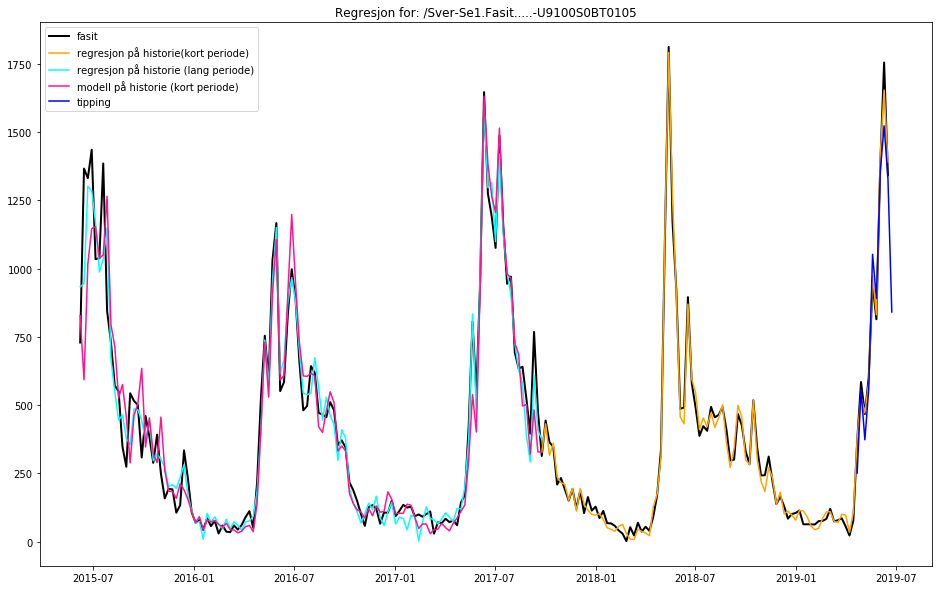

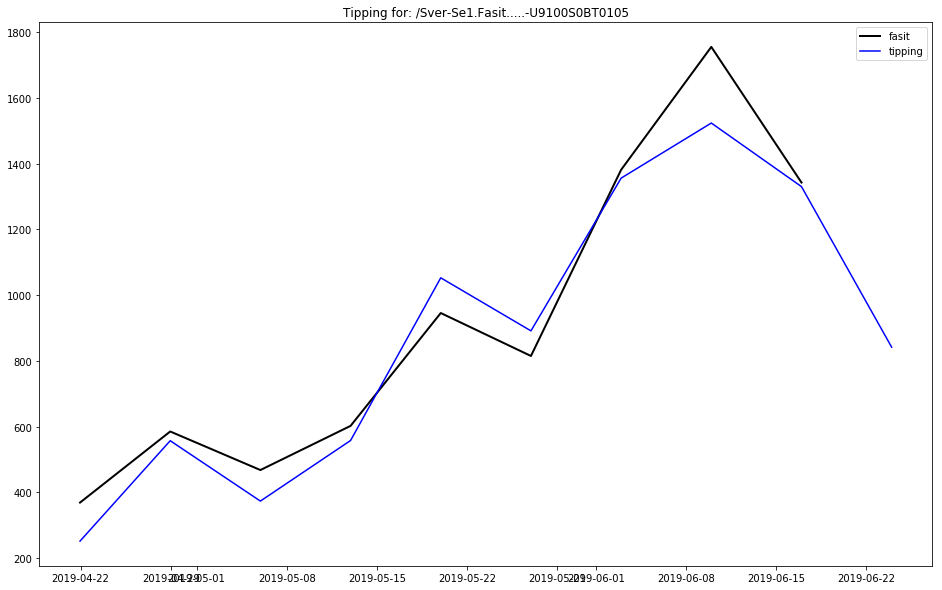

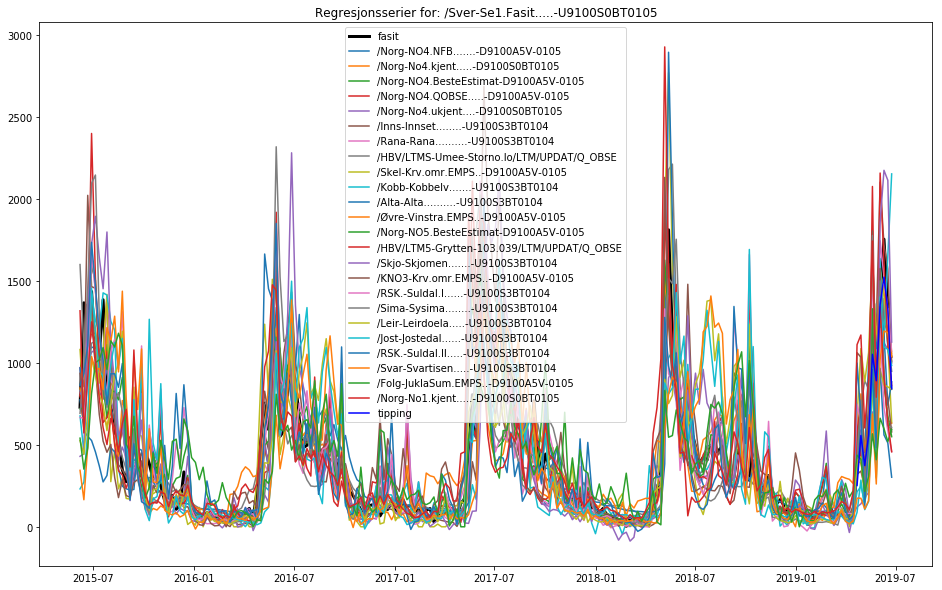


Regresjonen med tuning tok 18 minutter. 

---------------------------------------------------------------
                         SLUTT                                 
---------------------------------------------------------------

Scriptet brukte totalt 121 minutter. 



In [7]:
all_variables = ['magasin','tilsig']
all_regions = ['NO1','NO2','NO3','NO4','NO5','SE1','SE2','SE3','SE4']
columns=['ant_kandidater', 'ant_serier', 'r2_modelled', 'r2_tippet', 'r2_samlet', 'reg_period', 'max_p']
#Initializing
max_p = 0.025
reg_period = 208 #Finn hele perioden

for variable in ['tilsig']:
    
    if variable == 'tilsig':
        print('---------------------------------------------------------------')
        print('                        TILSIG                                 ')
        print('---------------------------------------------------------------')
        max_kandidater = 196
        min_kandidater = 100
        print('variable = {}'.format(variable))
    elif variable == 'magasin':
        print('---------------------------------------------------------------')
        print('                        MAGASIN                                ')
        print('---------------------------------------------------------------')
        max_kandidater = 135
        min_kandidater = 100
        print('variable = {}'.format(variable))
    max_weeks = 208
    min_weeks = 90
    print('max ant. kandidater: {}, min ant. kandidater: {}'.format(max_kandidater, min_kandidater))
    print('max ant. uker: {}, min ant. uker: {}'.format(max_weeks, min_weeks))
        
        
    for region in ['SE1']:
        start_time_loop = utctime_now()
        #Første loop: Tuner antall kandidater som gir best R2 samlet
        df_ant_kandidater = pd.DataFrame(columns=columns)
        for antall in range(min_kandidater,max_kandidater,5):
            output = make_estimate_while_looping(variable, region, auto_input[variable], reg_period, max_p, antall)
            df_ant_kandidater = df_ant_kandidater.append({columns[0]:output[0], columns[1]:output[1], columns[2]:output[2], columns[3]:output[3], columns[4]:output[4], columns[5]:output[5], columns[6]:output[6]},ignore_index=True)
        idx_max = df_ant_kandidater.r2_samlet.idxmax(skipna=True)
        ant_kandidater_beste = int(df_ant_kandidater.ant_kandidater.values[idx_max])
        print('Beste ant_kandidater loop 1: ', ant_kandidater_beste)
        
        #Andre loop: tuner lengden på den korte regresjonen som gir best R2 samlet  
        df_reg_period = pd.DataFrame(columns=columns)
        for period in range(min_weeks,max_weeks,5):
            period = int(period)
            output = make_estimate_while_looping(variable, region, auto_input[variable], period, max_p, ant_kandidater_beste)
            df_reg_period = df_reg_period.append({columns[0]:output[0], columns[1]:output[1], columns[2]:output[2], columns[3]:output[3], columns[4]:output[4], columns[5]:output[5], columns[6]:output[6]},ignore_index=True)
        idx_max = df_reg_period.r2_samlet.idxmax(skipna=True)
        reg_period_beste = int(df_reg_period.reg_period.values[idx_max])
        print('Beste reg_period loop 2: ', reg_period_beste)

        #Tredje loop: tuner valget av max p-verdi som gir best R2 samlet  
        #df_max_p = pd.DataFrame(columns=columns)
        #for max_p in np.linspace(0.001,0.015,5):
        #    output = make_estimate_while_looping(variable, region, auto_input[variable], reg_period, max_p, ant_kandidater)
        #    df_max_p = df_max_p.append({columns[0]:output[0], columns[1]:output[1], columns[2]:output[2], columns[3]:output[3], columns[4]:output[4], columns[5]:output[5], columns[6]:output[6]},ignore_index=True)
        #idx_max = df_max_p.r2_samlet.idxmax(skipna=True)
        #max_p = df_max_p.max_p.values[idx_max]
        #print('Valgte max_p til å være: ', max_p)
        
        #FINAL RESULTS AFTER TUNING
        #Update with the iput which gives the best R2 samlet
        df_all_methods = pd.concat([df_ant_kandidater,df_reg_period], ignore_index=True, sort=False)
        idx_max = df_all_methods.r2_samlet.idxmax(skipna=True)
        ant_kandidater_beste = int(df_all_methods.ant_kandidater.values[idx_max])
        reg_period_beste = df_all_methods.reg_period.values[idx_max]
        max_p = df_all_methods.max_p.values[idx_max]
        write_input_variables_to_file(region, variable, max_p, ant_kandidater_beste, reg_period_beste)
        #Show results
        show_result_input = make_estimate_and_write(variable, region, auto_input[variable], backup=False)
        show_result_jupyter(show_result_input)
        print('\nRegresjonen med tuning tok %.0f minutter. \n' %((utctime_now() - start_time_loop)/60))
        
        
print('---------------------------------------------------------------')
print('                         SLUTT                                 ')
print('---------------------------------------------------------------')
print('\nScriptet brukte totalt %.0f minutter. \n' %((utctime_now() - start_time)/60))
